In [1]:
import os
import numpy as np
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
categories=['without_mask','with_mask']

In [3]:
os.path.join('')

''

mask_images\data\without_mask\without_mask_1.jpg


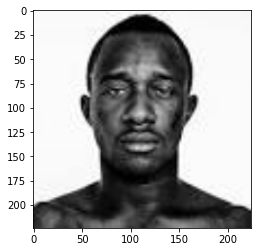

In [4]:
path=os.path.join('mask_images\data',categories[0])

for file in os.listdir(path):
    image_pth=os.path.join(path,file)
    print(image_pth)
    img=cv2.imread(image_pth)
    
    img=cv2.resize(img,(224,224))
    plt.imshow(img,cmap='gray')
    break

In [ ]:
data=[]

for i in categories:
    path=os.path.join('mask_images\data',i)

    label=categories.index(i)
    print(label)
    
    for file in os.listdir(path):
        image_pth=os.path.join(path,file)
    #     print(image_pth)
        img=cv2.imread(image_pth)

        img=cv2.resize(img,(224,224))
        data.append([img,label])

In [ ]:
X=[]
y=[]
for features,labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X=np.array(X)
y=np.array(y)
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.85,random_state=0)

In [ ]:
X_train.shape

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)


In [ ]:
from keras.applications.vgg16 import VGG16
vgg=VGG16()
vgg.summary()

In [ ]:
from keras import Sequential

model=Sequential()

for layer in vgg.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.summary()

In [ ]:
model.add(Dense(1,activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size = 100,epochs=1)

In [ ]:
model.save("detect_mask")


In [5]:
model = keras.models.load_model('detect_mask')


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [7]:
cap=cv2.VideoCapture(0)

In [8]:
def detect_face_mask(img):
    predictions = (model.predict(img.reshape(1,224,224,3)) > 0.5).astype("int32")
    return predictions[0][0]

In [9]:
def draw_label(img,text,pos,bg_color):
    text_size=cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
    
    end_x=pos[0]+text_size[0][0]+2
    end_y=pos[1]+text_size[0][1]+2
    
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [14]:
while True:
    ret,frame=cap.read()
    frame1=cv2.resize(frame,(224,224))
    y_pred=detect_face_mask(frame1)
    if y_pred==1:
        draw_label(frame,"Mask",(30,30),(0,255,0))
    else:
        draw_label(frame,"No Mask",(30,30),(0,0,255))
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF==ord('x'):
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 185ms/step


KeyboardInterrupt: 